In [187]:
# 用於讀取資料
import pandas as pd

# 讀取CSV文件
data = pd.read_csv('mnist_test.csv')
print(data.head())


   label  1x1  1x2  1x3  1x4  1x5  1x6  1x7  1x8  1x9  ...  28x19  28x20  \
0      7    0    0    0    0    0    0    0    0    0  ...      0      0   
1      2    0    0    0    0    0    0    0    0    0  ...      0      0   
2      1    0    0    0    0    0    0    0    0    0  ...      0      0   
3      0    0    0    0    0    0    0    0    0    0  ...      0      0   
4      4    0    0    0    0    0    0    0    0    0  ...      0      0   

   28x21  28x22  28x23  28x24  28x25  28x26  28x27  28x28  
0      0      0      0      0      0      0      0      0  
1      0      0      0      0      0      0      0      0  
2      0      0      0      0      0      0      0      0  
3      0      0      0      0      0      0      0      0  
4      0      0      0      0      0      0      0      0  

[5 rows x 785 columns]


In [188]:
# labels代表csv檔第一欄資料(數字)
labels = data.iloc[:, 0]
# pixels代表csv檔第二欄以後的資料(RGB值)
pixels = data.iloc[:, 1:]


In [189]:
# 用於轉換成numpy array
import numpy as np

# 將pixels轉換為numpy array
images = pixels.to_numpy()
# 轉換成28*28的圖片，-1代表自動計算矩陣維度
images = images.reshape(-1, 28, 28)


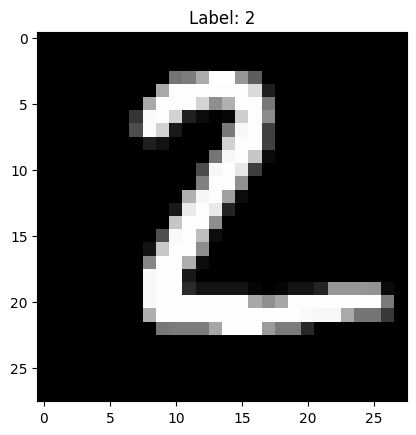

In [190]:
# 用於圖片視覺化
import matplotlib.pyplot as plt

# 檢查圖片是否圖取成功
plt.imshow(images[1], cmap='gray')
plt.title(f'Label: {labels.iloc[1]}')
plt.show()


In [191]:
# 將圖片正規化
images = images / 255.0


In [192]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch.nn.functional as F
import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as data_utils
from sklearn.model_selection import train_test_split

# 將images轉換成tensor
tensor_x = torch.tensor(images, dtype=torch.float32)
# 添加通道維度
tensor_x = tensor_x.unsqueeze(1) 
# 將labels轉換成tensor
tensor_y = torch.tensor(labels.values, dtype=torch.long)
# 轉換成訓練集和測試集
X_train, X_test, y_train, y_test = train_test_split(
    tensor_x, tensor_y, test_size=0.2, random_state=120
)
# 將訓練集和測試集轉換成tensor dataset
train_dataset = data_utils.TensorDataset(X_train, y_train)
test_dataset = data_utils.TensorDataset(X_test, y_test)
# 將dataset轉換成data loader
train_loader = data_utils.DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = data_utils.DataLoader(test_dataset, batch_size=16, shuffle=False)


# 自定義DNN模型
class DNNNet(nn.Module):
    # 模型建構子
    def __init__(self):
        # 繼承父類別，DNN模型的介面
        super(DNNNet, self).__init__()
        # 第一層隱藏層
        self.fc1 = nn.Linear(28 * 28, 1024)
        # 第二層隱藏層
        self.fc2 = nn.Linear(1024, 512)
        # 第三層隱藏層
        self.fc3 = nn.Linear(512, 256)
        # 第四層隱藏層
        self.fc4 = nn.Linear(256, 128)
        # 輸出層
        self.fc5 = nn.Linear(128, 10) 
    # 前向傳遞
    def forward(self, x):
        # 將圖片轉換成28*28的矩陣
        x = x.view(-1, 28 * 28)
        # 激活函數
        x = F.relu(self.fc1(x))
        
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = self.fc5(x)
        return x

# 實例化模型
model = DNNNet()
# 定義損失函數
criterion = nn.CrossEntropyLoss()
# 定義優化器
optimizer = optim.Adam(model.parameters(), lr=0.001)
# 定義學習率調整器
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.1)
# 定義訓練輪次
num_epochs = 20
# 訓練模型
for epoch in range(num_epochs):
    # 訓練模式
    model.train()  
    # 計算損失
    running_loss = 0.0
    # 訓練資料
    for i, (inputs, labels) in enumerate(train_loader):
        # 梯度歸零
        optimizer.zero_grad()
        # 前向傳遞
        outputs = model(inputs)
        # 計算損失
        loss = criterion(outputs, labels)
        # 反向傳遞
        loss.backward()
        # 更新參數
        optimizer.step()
        # 累加損失
        running_loss += loss.item()
    # 更新學習率
    scheduler.step()
    # 計算平均損失
    avg_loss = running_loss / len(train_loader)
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}')

# 評估模型
model.eval() 
# 計算正確率
correct = 0
# 計算總數
total = 0
# 計算損失
test_loss = 0.0
# 不計算梯度
with torch.no_grad():
    # 測試資料
    for inputs, labels in test_loader:
        # 前向傳遞
        outputs = model(inputs)
        # 計算損失
        loss = criterion(outputs, labels)
        # 累加損失
        test_loss += loss.item()
        # 計算正確率


        _, predicted = torch.max(outputs.data, 1)
        
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
# 計算平均損失
avg_test_loss = test_loss / len(test_loader)
# 計算正確率
accuracy = 100 * correct / total
print(f'Test Loss: {avg_test_loss:.4f}, Accuracy: {accuracy:.2f}%')


Epoch [1/20], Loss: 0.5304
Epoch [2/20], Loss: 0.2047
Epoch [3/20], Loss: 0.1268
Epoch [4/20], Loss: 0.1010
Epoch [5/20], Loss: 0.0857
Epoch [6/20], Loss: 0.0608
Epoch [7/20], Loss: 0.0502
Epoch [8/20], Loss: 0.0409
Epoch [9/20], Loss: 0.0705
Epoch [10/20], Loss: 0.0387
Epoch [11/20], Loss: 0.0128
Epoch [12/20], Loss: 0.0040
Epoch [13/20], Loss: 0.0019
Epoch [14/20], Loss: 0.0009
Epoch [15/20], Loss: 0.0005
Epoch [16/20], Loss: 0.0003
Epoch [17/20], Loss: 0.0002
Epoch [18/20], Loss: 0.0001
Epoch [19/20], Loss: 0.0000
Epoch [20/20], Loss: 0.0000
Test Loss: 0.2568, Accuracy: 96.80%
